##**Importando Bibliotecas**

In [2]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
 
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)

## **Obtendo Dados através da API do Banco Central do Brasil**

In [3]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

### **Exemplo de Dados na API do Banco Central do Brasil**

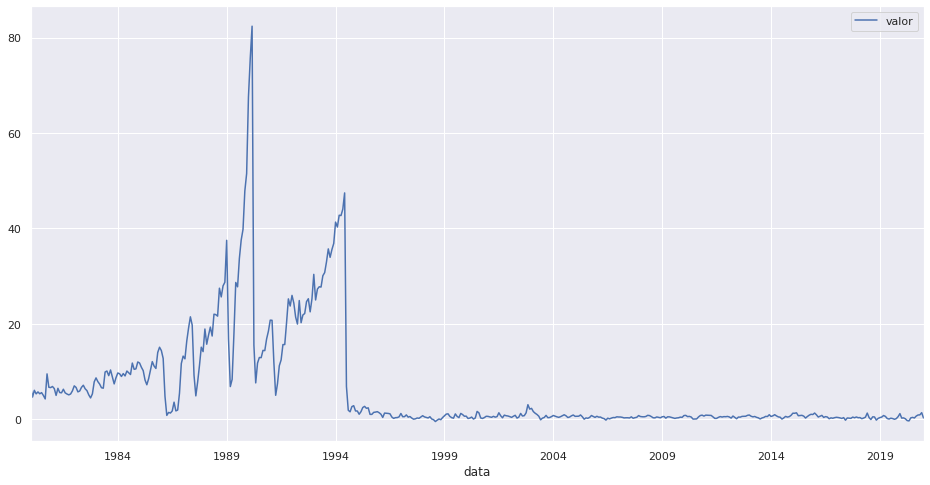

In [7]:
ipca = consulta_bc(433)
ipca.plot()

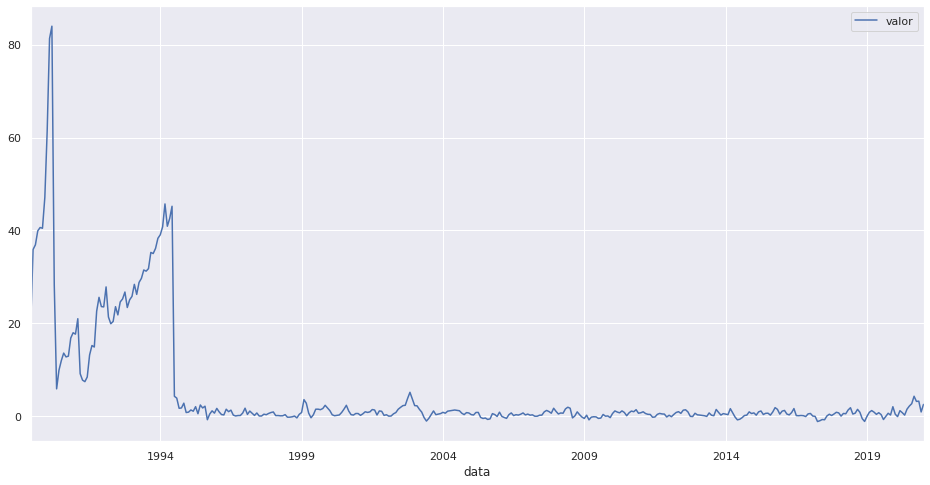

In [5]:
igpm = consulta_bc(189)
igpm.plot()

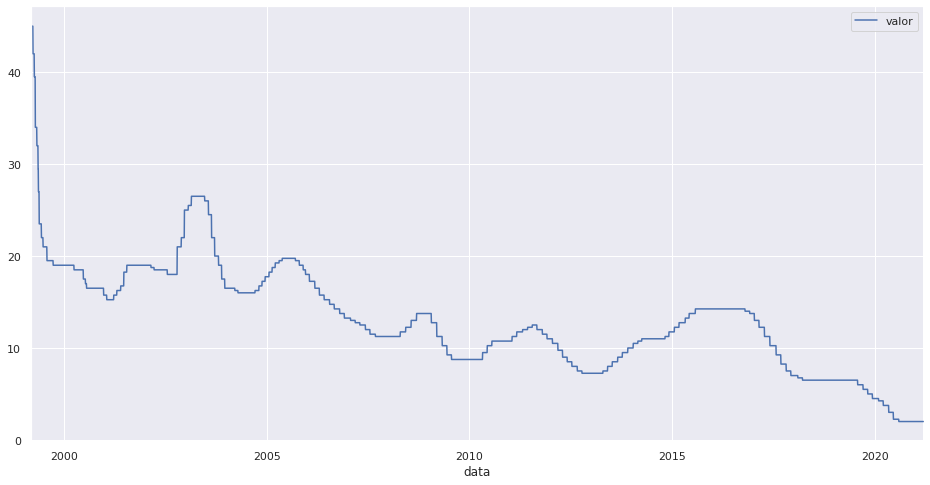

In [8]:
selic_meta = consulta_bc(432)
selic_meta.plot()

In [9]:
reservas_internacionais = consulta_bc(13621)

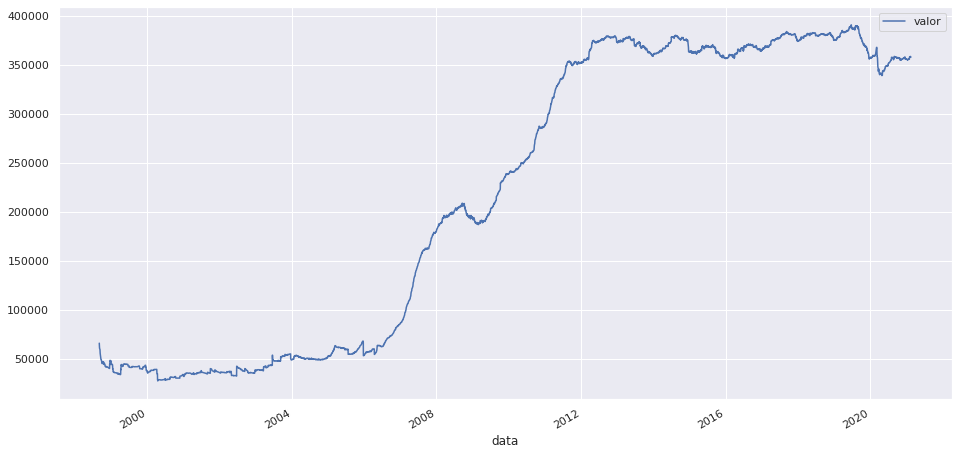

In [10]:
reservas_internacionais.plot()

###Taxa de Desemprego

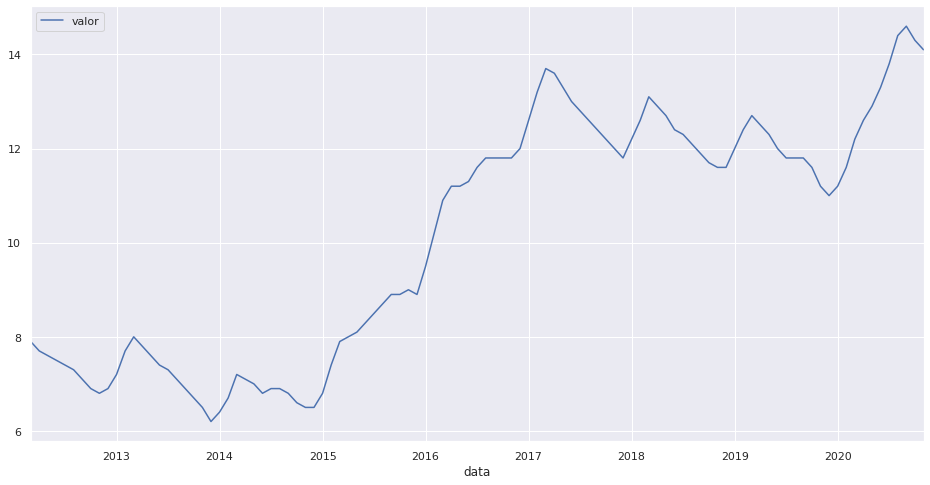

In [21]:
pnad = consulta_bc(24369)
pnad.plot()

## **CDI vs IBOVESPA**

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [13]:
ibov = yf.download(tickers='^BVSP')[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


In [14]:
ibov_retorno = ibov.pct_change()

In [15]:
cdi = consulta_bc(12)

In [16]:
data_inicio = '2018-01-01'

In [17]:
ibov_retorno_acumulado = (1 + ibov_retorno[ibov_retorno.index >= data_inicio]).cumprod()
ibov_retorno_acumulado.iloc[0] = 1

In [18]:
cdi_acumulado = (1 + cdi[cdi.index >= data_inicio] / 100).cumprod()
cdi_acumulado.iloc[0] = 1

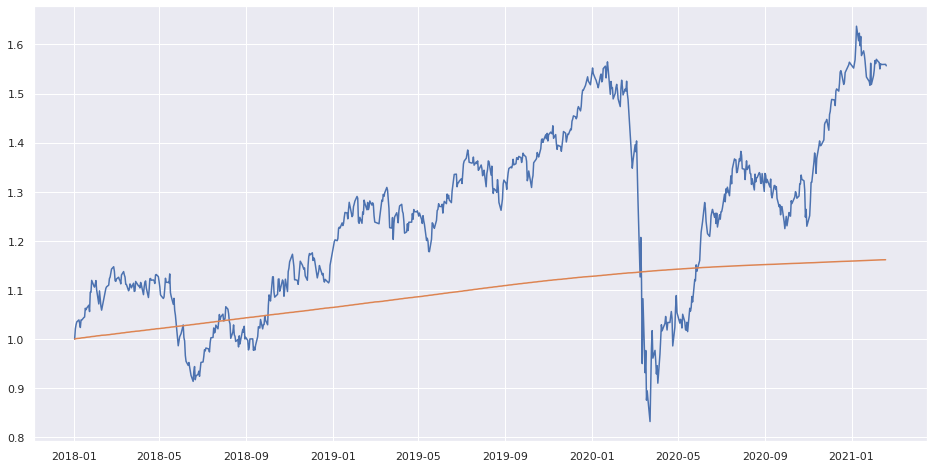

In [19]:
fig, ax = plt.subplots()
ax.plot(ibov_retorno_acumulado)
ax.plot(cdi_acumulado);